# 0. Import and useful functions

## 0.1 Gam calc functions

In [2]:
from GAMcalc import *
from FEcalc import *
import propagator 
import wignerD as wd

import numpy as np
from scipy import optimize
from numpy.linalg import eig

## 0.3 Plot power laws

In [3]:
def plotlog(x, y, alpha, xrange=1, numx=2, color='k', plt=plt):
    xv = np.logspace(np.log10(x), np.log10(x) + xrange, numx)
    C = y / (x**alpha)
    yv = C * xv**(alpha)
    plt.loglog(xv, yv, '--', color=color)

# 1. Melt vertices

## 1.1 Simple examples

In [ ]:
N = 10
FA = 0.5
K = 10
CHI = 0

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
Ks3 = set3Ks(KS)
Ks4 = set4Ks(KS)

print(gamma2(pset, N, FA, K, CHI))
print(gamma3(pset, N, FA, Ks3))
print(gamma4(pset, wigset, N, FA, Ks4))

## 1.2 Vertices at all qs

### 1.2.1 Gamma2 at all q

In [ ]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

In [ ]:
plt.loglog(KV, 1/gam2.real)
plt.show()

### 1.2.2 Gamma3 at all q

In [ ]:
N=10
FA=0.2

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam3 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set3Ks(K)
    gam3[i] = gamma3(pset, N, FA, Ks)

In [ ]:
plt.loglog(KV, -gam3.real)
plt.loglog(KV, gam3.real)
plt.show()

### 1.2.3 Gamma4 at all q

In [ ]:
N=10
FA=0.2

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()
KV = np.logspace(-1,3,20)
gam4 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    print(K)
    Ks = set4Ks(K)
    gam4[i] = gamma4(pset, wigset, N, FA, Ks)

In [ ]:
plt.loglog(KV, gam4.real)
plt.loglog(KV, -gam4.real)
plt.show()

## 1.3 Vertices at q*

### 1.3.1 Gamma2 and find q*

In [ ]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

In [ ]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [ ]:
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(pset, N, FA)

In [ ]:
plt.loglog(NV, 1/KSV)
plt.show()

### 1.3.2 Gamma3 at q*

In [ ]:
FAV = np.linspace(.2, .5, 21)
pset=propagator.prop_set(nlam=10)

N = 1000
GAM3N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1000[ind] = gamma3(pset, N, FA, Ks)*N

N = 100
GAM3N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N100[ind] = gamma3(pset, N, FA, Ks)*N

N = 1
GAM3N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1[ind] = gamma3(pset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, -GAM3N_N1000.real, label='N=1000')
plt.plot(FAV, -GAM3N_N100.real, label='N=100')
plt.plot(FAV, -GAM3N_N1.real, label='N=1')
plt.xlabel('$f_A$')
plt.ylabel('$-N\Gamma_{3}(q^*)$')
plt.legend(loc=1)
plt.axis([.2,.5,0,200])
plt.show()

### 1.3.3 Gamma4 at q*

In [ ]:
FAV = np.linspace(.3, .5, 21)
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1000
GAM4N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1000[ind] = gamma4(pset, wigset, N, FA, Ks)*N

N = 100
GAM4N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N100[ind] = gamma4(pset, wigset, N, FA, Ks)*N

    
N = 10
GAM4N_N10 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N10[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    
N = 1
GAM4N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1[ind] = gamma4(pset, wigset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, GAM4N_N1000.real, label='N=1000')
plt.plot(FAV, GAM4N_N100.real, label='N=100')
plt.plot(FAV, GAM4N_N10.real, label='N=10')
plt.plot(FAV, GAM4N_N1.real, label='N=1')
plt.axis([.3,.5,100,500])
plt.box
plt.legend(loc=1)
plt.show()

## 1.4 Plot free energy

In [ ]:
N = 1e3
FA = 0.3

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()
Ks = spinodal(pset, N, FA)

# calculate vertices
gam3 = gamma3(pset, N, FA, set3Ks(Ks)).real
gam41 = gamma4(pset, wigset, N, FA, set4Ks1(Ks)).real
gam42 = gamma4(pset, wigset, N, FA, set4Ks2(Ks)).real
gam43 = gamma4(pset, wigset, N, FA, set4Ks3(Ks)).real
gam44 = gamma4(pset, wigset, N, FA, set4Ks4(Ks)).real
print(Ks)
print(gam3*N)
print(gam41*N)

In [ ]:
CHI = 1/N
AV = np.linspace(0, 50, 100)

plt.plot(AV, N*FE1(AV, CHI, gam41), label='LAM')
plt.plot(AV, N*FE3(AV, CHI, gam3, gam41, gam42), label='CYL')
plt.plot(AV, N*FE6(AV, CHI, gam3, gam41, gam42, gam43, gam44), label='BCC')
plt.xlabel('Amplitude')
plt.ylabel('Free Energy')
plt.legend()
# plt.axis([0,50,-0.1,1])
plt.axis([0, 40, -10,10])
plt.show()

print('LAM FE')
print(optimize.fmin(lambda A: FE1(A, CHI, gam41),
                    1, disp=False, full_output=1))
print('CYL FE')
print(optimize.fmin(lambda A: FE3(A, CHI, gam3, gam41, gam42),
                    1e-1, disp=False, full_output=1))
print('BCC FE')
print(optimize.fmin(lambda A: FE6(A, CHI, gam3, gam41, gam42, gam43, gam44),
                    1e-1, disp=False, full_output=1))

## 1.5 Make phase diagrams

In [5]:
chioot(100, 0.3)

(0.073003560271214837, 0.0013127702877559783)

In [ ]:
N = 100
FAV = np.linspace(.15, .499, 21)
pset=propagator.prop_set(nlam=1)
    
CHIsV = np.zeros((len(FAV), 1))
CHI13V = np.zeros((len(FAV), 1))
CHI36V = np.zeros((len(FAV), 1))

for i, FA in enumerate(FAV):
    CHIsV[i] = chis(N, FA)
    CHI13V[i], CHI36V[i] = chioot(N, FA)
    print(N, FA, CHIsV[i], CHI13V[i], CHI36V[i])

In [ ]:
plt.figure(figsize=(4,5))
plt.plot(FAV, CHIsV*N)
plt.plot(FAV, (CHIsV+CHI13V)*N)
plt.plot(FAV, (CHIsV+CHI36V)*N)
plt.plot(1-FAV, CHIsV*N)
plt.plot(1-FAV, (CHIsV+CHI13V)*N)
plt.plot(1-FAV, (CHIsV+CHI36V)*N)
plt.axis([0.15,0.85,10,80])
plt.show()

## 1.5 Look at UV divergence

### First N = 1000

In [ ]:
N = 1000
FA = 0.5

normK = 1  # equals 2lp if =1
# normK = np.sqrt(N/6)
# KV = np.logspace(-1, 2, 201)/normK
KV = np.linspace(1e-2, 0.5, 1001)/normK
p = KV*normK
CHI = 10/N

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
GAM4N1 = np.zeros((len(KV),), dtype='complex')
GAM2 = np.zeros((len(KV),), dtype='complex')
for ii, K in enumerate(KV):
    Ks41 = set4Ks1(K)
    GAM4N1[ii] = gamma4(pset, wigset, N, FA, Ks41)
    GAM2[ii] = gamma2(pset, N, FA, K, CHI)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4.5))
ax1.loglog(p, 1./GAM2.real, '-', color='r')
ax1.set_xlabel('$2l_{p}q$')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('$1/\Gamma{2}$', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.loglog(p, GAM4N1.real, 'b-')
ax2.set_ylabel('$\Gamma_{4}$', color='b')
ax2.tick_params('y', colors='b')

# add power laws
plotlog(6e-1, 1.5e1, -2, xrange=0.5, color='r', plt=ax1)
plotlog(6e-1, 3e0, 2, xrange=0.4, color='b', plt=ax2)
plotlog(5e1, 2.5e-2, -1, xrange=0.5, color='r', plt=ax1)
plotlog(5e1, 9e2, 1, xrange=0.5, color='b', plt=ax2)

plt.xlim(0.1,1e2)
fig.tight_layout()
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/GAMsN'+str(N)+'.eps')

In [ ]:
# Brazovskii approx.
KSs41 = set4Ks1(KS)
GAM4KS = gamma4(pset, wigset, N, FA, KSs41)
pS = KS*normK
braz = pS**2*GAM4KS.real/GAM2.real

In [ ]:
plt.figure(figsize=(6,4.5))
plt.loglog(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.loglog(p, braz, 'k-.', label='Brazovskii approx.')
plt.axis([0.1,1e2,1e-5,1e6])
plotlog(50,5e4,2)
plotlog(6e-1,1.5e1,2,xrange=0.4)
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/BrazN'+str(N)+'.eps')

In [ ]:
plt.figure(figsize=(6,4.5))
plt.plot(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.plot(p, braz, 'k--', label='Brazovskii approx.')
plt.axis([0.1,0.5,0,5])
plt.title('N='+str(N))
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.legend()
# plt.show()
plt.savefig('figs/Braz2N'+str(N)+'.eps')

### Consider N = 1

In [ ]:
N = 1
FA = 0.5
KS = spinodal(pset, N, FA)

normK = 1  # equals 2lp if =1
# normK = np.sqrt(N/6)
KV = np.linspace(1e-2, 20, 501)/normK
# KV = np.logspace(-1, 2, 201)/normK
p = KV*normK
CHI = 6/N

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()

GAM4N1 = np.zeros((len(KV),), dtype='complex')
GAM2 = np.zeros((len(KV),), dtype='complex')
for ii, K in enumerate(KV):
    print(ii)
    Ks41 = set4Ks1(K)
    GAM4N1[ii] = gamma4(pset, wigset, N, FA, Ks41)
    GAM2[ii] = gamma2(pset, N, FA, K, CHI)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4.5))
ax1.loglog(p, 1./GAM2.real, '-', color='r')
ax1.set_xlabel('$2l_{p}q$')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('$1/\Gamma{2}$', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.loglog(p, GAM4N1.real, 'b-')
ax2.set_ylabel('$\Gamma_{4}$', color='b')
ax2.tick_params('y', colors='b')

# add power laws
plotlog(5e1, 2.5e-2, -1.05, xrange=0.5, color='r', plt=ax1)
plotlog(5e1, 1.4e3, 1, xrange=0.5, color='b', plt=ax2)

plt.xlim(0.1,1e2)
fig.tight_layout()
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/GAMsN'+str(N)+'.eps')

In [ ]:
# Brazovskii approx.
KSs41 = set4Ks1(KS)
GAM4KS = gamma4(pset, wigset, N, FA, KSs41)
pS = KS*normK
braz = pS**2*GAM4KS.real/GAM2.real

In [ ]:
plt.figure(figsize=(6,4.5))
plt.loglog(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.loglog(p, braz, 'k-.', label='Brazovskii approx.')
plt.axis([0.1,1e2,1e-1,1e6])
plotlog(50,6e4,2)
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/BrazN'+str(N)+'.eps')

In [ ]:
plt.figure(figsize=(6,4.5))
plt.plot(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.plot(p, braz, 'k--', label='Brazovskii approx.')
plt.axis([0.1,20,0,2e4])
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
plt.legend()
# plt.show()
plt.savefig('figs/Braz2N'+str(N)+'.eps')

## Check numerical convergence 

In [ ]:
# NV = np.logspace(0,3,11)
NV = [1e3]
G4N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

In [ ]:
NV = np.logspace(0,3,11)
G4N = np.zeros((len(NV)), dtype='complex')
S3N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

In [ ]:
plt.semilogx(NV, G4N)
plt.show()

## Write to file

In [ ]:
# Figure 1 data

filename = 'data/fig1data'
f1 = open(filename, 'w')

FAV = [0.5]
# NV = np.logspace(-1,3,81)
NV = [1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks41 = set4Ks1(KS)
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        f1.write(' %.4f, %.2f, %.2f, %.4f\n' %(N, FA, 0, GAM4N1[ii][jj].real))
        print(' %.4f, %.2f, %.2f, %.4f' %(N, FA, 0, GAM4N1[ii][jj].real))
f1.close()

In [ ]:
# Figure 2 data

filename = 'data/fig2data'
f2 = open(filename, 'w')

FAV = np.linspace(0.1,0.5,41)
NV = [100,50,10]

pset=propagator.prop_set(nlam=3)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks3 = set3Ks(KS)
        Ks41 = set4Ks1(KS)
        Ks42 = set4Ks2(KS)
        Ks43 = set4Ks3(KS)
        Ks44 = set4Ks4(KS)
        
        GAM3N[ii][jj] = gamma3(pset, N, FA, Ks3)*N
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        GAM4N2[ii][jj] = gamma4(pset, wigset, N, FA, Ks42)*N
        GAM4N3[ii][jj] = gamma4(pset, wigset, N, FA, Ks43)*N
        GAM4N4[ii][jj] = gamma4(pset, wigset, N, FA, Ks44)*N
        f2.write(' %.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f\n' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
        print('%.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
f2.close()

# 3. Solution vertices

## 3.1 Vertices at all qs

### 3.1.1 Gamma2 at all q

In [122]:
N=1e5
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.2

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)/np.sqrt(r2(N))
gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

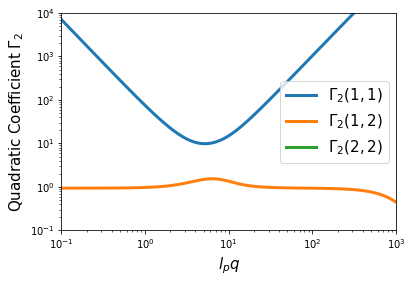

In [123]:
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 0].real, label='$\Gamma_2(1,1)$', linewidth=3)
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 1].real, label='$\Gamma_2(1,2)$', linewidth=3)
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 1, 1].real, label='$\Gamma_2(2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('$l_{p}q$', fontsize=15)
plt.ylabel('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
plt.axis([1e-1,1e3,1e-1,1e4])
plt.show()
# plt.savefig('figs/gam21.eps')

In [124]:
N=1e5
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.8

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)/np.sqrt(r2(N))
gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

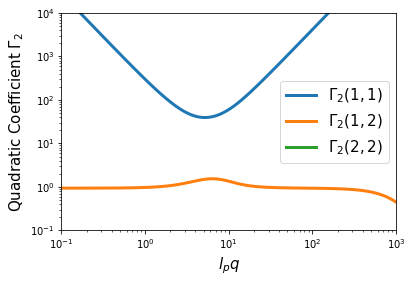

In [125]:
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 0].real, label='$\Gamma_2(1,1)$', linewidth=3)
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 1].real, label='$\Gamma_2(1,2)$', linewidth=3)
plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 1, 1].real, label='$\Gamma_2(2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('$l_{p}q$', fontsize=15)
plt.ylabel('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
plt.axis([1e-1,1e3,1e-1,1e4])
plt.show()
# plt.savefig('figs/gam21.eps')

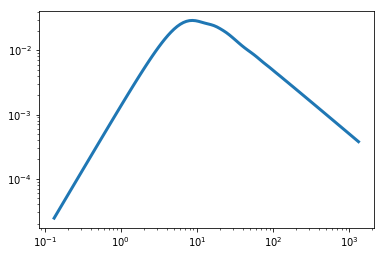

In [113]:
plt.loglog(KV, PHIP/(N*gam2sol[..., 0, 0].real), label='$\Gamma_2(1,1)$', linewidth=3)
plt.show()

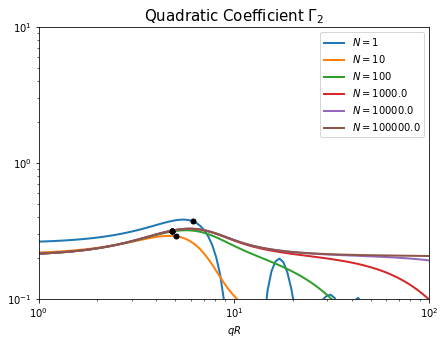

In [6]:
FA=0.4
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP=0.5

plt.figure(figsize=(7,5))
for N in [1, 10, 100, 1e3, 1e4, 1e5]:
    pset=propagator.prop_set(nlam=1)
    
    _, Kstar, _ = gamma2sol_spinodal(pset, N, FA, PHIP)
    gam2starsol = gamma2sol(pset, N, FA, PHIP, Kstar, CHIAB, CHIAS, CHIBS)
    
    KV = np.logspace(0,2,100)/np.sqrt(r2(N))
    gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
    for i, K in enumerate(KV):
        gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

    plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 1].real,
               label='$N=$'+str(N), linewidth=2)
    plt.plot(Kstar*np.sqrt(r2(N)), N*gam2starsol[0,1].real, 'k.', markersize=10)

plt.legend()
plt.xlabel('$qR$')
plt.title('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
plt.axis([1e0,1e2,1e-1,1e1])
plt.show()

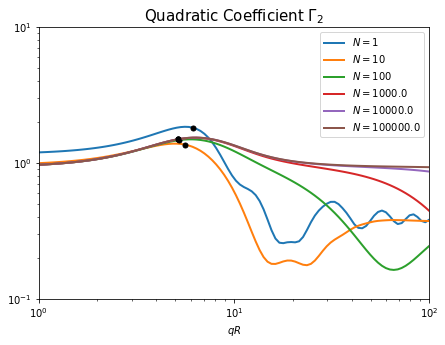

In [142]:
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0

plt.figure(figsize=(7,5))
for N in [1, 10, 100, 1e3, 1e4, 1e5]:
    pset=propagator.prop_set(nlam=1)
    
    _, Kstar, _ = gamma2sol_spinodal(pset, N, FA, PHIP)
    gam2starsol = gamma2sol(pset, N, FA, PHIP, Kstar, CHIAB, CHIAS, CHIBS)
    
    KV = np.logspace(0,2,100)/np.sqrt(r2(N))
    gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
    for i, K in enumerate(KV):
        gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

    plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 1].real,
               label='$N=$'+str(N), linewidth=2)
    plt.plot(Kstar*np.sqrt(r2(N)), N*gam2starsol[0,1].real, 'k.', markersize=10)

plt.legend()
plt.xlabel('$qR$')
plt.title('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
plt.axis([1e0,1e2,1e-1,1e1])
plt.show()

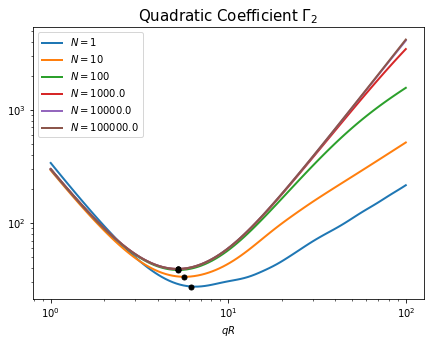

In [149]:
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0

plt.figure(figsize=(7,5))
for N in [1, 10, 100, 1e3, 1e4, 1e5]:
    pset=propagator.prop_set(nlam=1)
    
    _, Kstar, _ = gamma2sol_spinodal(pset, N, FA, PHIP)
    gam2starsol = gamma2sol(pset, N, FA, PHIP, Kstar, CHIAB, CHIAS, CHIBS)
    
    KV = np.logspace(0,2,100)/np.sqrt(r2(N))
    gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
    for i, K in enumerate(KV):
        gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

    plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 0, 0].real,
               label='$N=$'+str(N), linewidth=2)
    plt.plot(Kstar*np.sqrt(r2(N)), N*gam2starsol[0,0].real, 'k.', markersize=10)

plt.legend()
plt.xlabel('$qR$')
plt.title('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
# plt.axis([1e0,1e2,1e-1,1e1])
plt.show()

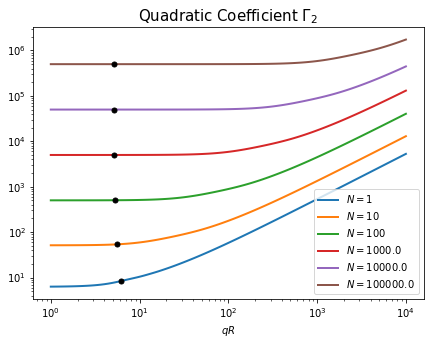

In [151]:
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0

plt.figure(figsize=(7,5))
for N in [1, 10, 100, 1e3, 1e4, 1e5]:
    pset=propagator.prop_set(nlam=1)
    
    _, Kstar, _ = gamma2sol_spinodal(pset, N, FA, PHIP)
    gam2starsol = gamma2sol(pset, N, FA, PHIP, Kstar, CHIAB, CHIAS, CHIBS)
    
    KV = np.logspace(0,4,100)/np.sqrt(r2(N))
    gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
    for i, K in enumerate(KV):
        gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

    plt.loglog(KV*np.sqrt(r2(N)), N*gam2sol[..., 1, 1].real,
               label='$N=$'+str(N), linewidth=2)
    plt.plot(Kstar*np.sqrt(r2(N)), N*gam2starsol[1,1].real, 'k.', markersize=10)

plt.legend()
plt.xlabel('$qR$')
plt.title('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
# plt.axis([1e0,1e2,1e-1,1e1])
plt.show()

### 3.1.2 Gamma3 at all q

In [ ]:
N=100
FA=0.2
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam3sol = np.zeros((len(KV), 2, 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set3Ks(K)
    gam3sol[i] = gamma3sol(pset, N, FA, PHIP, Ks)

In [ ]:
plt.loglog(KV, -gam3sol[..., 0, 0, 0].real, label='$-\Gamma_3(1,1,1)$', linewidth=3)
plt.loglog(KV, -gam3sol[..., 0, 0, 1].real, label='$-\Gamma_3(1,1,2)$', linewidth=3)
plt.loglog(KV, -gam3sol[..., 1, 1, 1].real, label='$-\Gamma_3(2,2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlim(1e-1,1e2)
# plt.ylim(1e-1,1e3)
plt.xlabel('$l_{p}q$', fontsize=15)
plt.ylabel('Cubic Coefficient $-\Gamma_{3}$', fontsize=13)
# plt.show()
plt.savefig('figs/gam31.eps')

### 3.1.3 Gamma4 at all q

In [ ]:
N=100
FA=0.2
PHIP = 0.5

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()
KV = np.logspace(-1,3,100)
gam4sol = np.zeros((len(KV), 2, 2, 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set4Ks(K)
    gam4sol[i] = gamma4sol(pset, wigset, N, FA, PHIP, Ks)

In [ ]:
plt.loglog(KV, gam4sol[..., 0, 0, 0, 0].real, label='$\Gamma_4(1,1,1,1)$', linewidth=3)
plt.loglog(KV, gam4sol[..., 0, 0, 1, 1].real, label='$\Gamma_4(1,1,2,2)$', linewidth=3)
plt.loglog(KV, gam4sol[..., 1, 1, 1, 1].real, label='$\Gamma_4(2,2,2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlim(1e-1,1e2)
# plt.ylim(1e-1,1e3)
plt.xlabel('$l_{p}q$', fontsize=13)
plt.ylabel('Quartic Coefficient $\Gamma_{4}$', fontsize=15)
# plt.show()
plt.savefig('figs/gam41.eps')

## Structure factors of diblock copolymer in solution

In [16]:
N=1
FA=0.5
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)/np.sqrt(r2(N))
# gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
mineig = np.zeros((len(KV), 1),dtype=type(1+1j))
maxeig = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    maxeig[i], _ = gamma2sol_biggereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    mineig[i], _ = gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

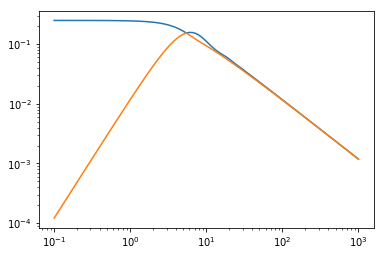

In [17]:
plt.loglog(KV*np.sqrt(r2(N)), 1./(N*mineig.real))
plt.loglog(KV*np.sqrt(r2(N)), 1./(N*maxeig.real))
plt.show()

In [ ]:
N=1
FA=0.2
CHIAB, CHIAS, CHIBS = 5/N/PHIP, 0, 0
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
# gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
mineig = np.zeros((len(KV), 1),dtype=type(1+1j))
maxeig = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    maxeig[i], _ = gamma2sol_biggereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    mineig[i], _ = gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

In [ ]:
plt.loglog(KV, 1./mineig.real)
plt.loglog(KV, 1./maxeig.real)
# plt.axis([1e-1,1e3,1e-3,1])
plt.show()

## find spinodals

In [88]:
N=1
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.1

pset=propagator.prop_set(nlam=1)

In [89]:
# FAV = np.linspace(.1, .9, 21)
FAV = np.linspace(.01, .499, 21)
CHIsV = np.zeros((len(FAV), 1))
CHIABsV = np.zeros((len(FAV), 1))
KsolsV = np.zeros((len(FAV), 1))
KsV = np.zeros((len(FAV), 1))

eigvminV = np.zeros((len(FAV), 2))

for ind, FA in enumerate(FAV):
    CHIABsV[ind], KsolsV[ind], _ = gamma2sol_spinodal(pset, N, FA, PHIP)
    
    CHIsV[ind] = chis(N, FA)
    KsV[ind] = spinodal(pset, N, FA)

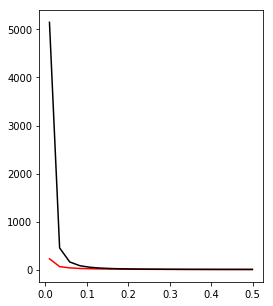

In [90]:
plt.figure(figsize=(4,5))
plt.plot(FAV, CHIABsV*N*PHIP, 'r-')
plt.plot(FAV, CHIsV*N, 'k-')
# plt.axis([0.15,0.85,10,30])
plt.show()

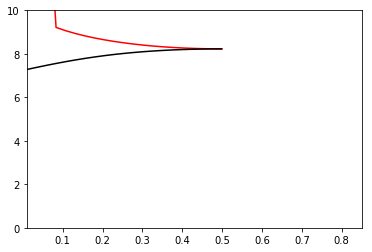

In [143]:
plt.plot(FAV, KsV, 'r-')
plt.plot(FAV, KsolsV, 'k-')
plt.xlim([0.01,0.85])
plt.ylim([0,10])
plt.show()

In [ ]:
for N in np.logspace(-1, )

## plot free energy

### Calculate free energy surfaces

In [51]:
# make surface plot of free energy at fixed CHIAB
N = 10
FA = 0.3
PHIP = 0.5

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

# find critical wavemode
CHIABs, Ks, eigvmin = gamma2sol_spinodal(pset, N, FA, PHIP)

gam3sol = gamma3sol(pset, N, FA, PHIP, set3Ks(Ks)).real
gam41sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks1(Ks)).real
gam42sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks2(Ks)).real
gam43sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks3(Ks)).real
gam44sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks4(Ks)).real

print(Ks, eigvmin)
print(gam3sol[0][0][0]*N/PHIP)
print(gam41sol[0][0][0][0]*N/PHIP)

1.68875284633 [ 0.98876456 -0.14948125]
-46.9861333904
444.83739092


[ 0.98876456 -0.14948125]


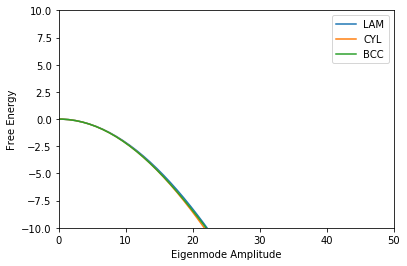

LAM FE
(array([ 64.91142979, -14.08149224]), -4.6879714923486269, 62, 118, 0)
CYL FE
(array([ 54.39093111,  -8.81074546]), -3.5961529842788877, 58, 111, 0)
BCC FE
(array([ 44.87747866,  -6.86035293]), -2.4866533403506783, 62, 119, 0)


In [52]:
# energy landscape in the eigvec direction
CHIAB = 5/N/PHIP

# calculate second order vertex (assuming invariant Ks)
CHIAS, CHIBS = 0, 0
gam2sol = gamma2sol(pset, N, FA, PHIP, Ks, CHIAB+CHIABs, CHIAS, CHIBS).real

Amax = 50
AeigV = np.linspace(-Amax,Amax,100)
FE1eigV = np.zeros((len(AeigV), 1))
FE3eigV = np.zeros((len(AeigV), 1))
FE6eigV = np.zeros((len(AeigV), 1))
print(eigvmin)

for i, A in enumerate(AeigV):
    A1 = eigvmin[0]*A
    A2 = eigvmin[1]*A
    FE1eigV[i] = FE1sol(A1, A2, gam2sol, gam41sol)
    FE3eigV[i] = FE3sol(A1, A2, gam2sol, gam3sol, gam41sol, gam42sol)
    FE6eigV[i] = FE6sol(A1, A2, gam2sol, gam3sol, gam41sol, gam42sol, gam43sol, gam44sol)

plt.plot(AeigV, N*FE1eigV, label='LAM')
plt.plot(AeigV, N*FE3eigV, label='CYL')
plt.plot(AeigV, N*FE6eigV, label='BCC')
plt.axis([0,50,-10,10])
# plt.xlim([0,50])
# plt.ylim([-.1,.1])
plt.xlabel('Eigenmode Amplitude')
plt.ylabel('Free Energy')
plt.legend()
plt.show()

Avec0 = [10,10]
print('LAM FE')
print(optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], gam2sol, gam41sol),
                  Avec0, disp=False, full_output=1))
print('CYL FE')
print(optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], gam2sol,
                                      gam3sol, gam41sol, gam42sol),
                  Avec0, disp=False, full_output=1))
print('BCC FE')
print(optimize.fmin(lambda Avec: FE6sol(Avec[0], Avec[1], gam2sol,
                                      gam3sol, gam41sol, gam42sol, gam43sol, gam44sol),
                  Avec0, disp=False, full_output=1))

In [ ]:
plt.plot(AV, N*FE1(AV, CHI, gam41),'r-', label='LAM')
plt.plot(AV, N*FE3(AV, CHI, gam3, gam41, gam42), 'b-', label='CYL')
plt.plot(AV, N*FE6(AV, CHI, gam3, gam41, gam42, gam43, gam44), 'k-', label='BCC')
plt.plot(AeigV, N*FE1eigV, 'r-', label='LAM')
plt.plot(AeigV, N*FE3eigV, 'b-', label='CYL')
plt.plot(AeigV, N*FE6eigV, 'k-', label='BCC')
# plt.axis([0,50,-0.1,0.5])

### Energy surface

In [66]:
def plotsurface(ax, X, Y, FE, eigvmin, Amin, 
                twomin=False, clims=[-20, 20], xlims=False, ylims=False):
    plt.axes(ax)
    cf = plt.pcolor(X, Y, FE, cmap=plt.cm.jet, vmin=clims[0], vmax=clims[1])

    # plot eig. vector direction
    plt.plot(X[0], X[0]*eigvmin[1]/eigvmin[0], 'w', zorder=1)
    if twomin:
        plt.plot(Amin[0], Amin[1], 'wo', markersize=5, zorder=1)
        plt.plot(-Amin[0], -Amin[1], 'wo', markersize=5, zorder=1)
    else:
        plt.plot(Amin[0], Amin[1], 'wo', markersize=5, zorder=1)
    plt.plot(0, 0, 'wo', markersize=5, zorder=1)
    plt.xlabel('$a_{1}$', fontsize=15)
    plt.ylabel('$a_{2}$', fontsize=15)
    
    if xlims:
        plt.xlim(xlims)
    if ylims:
        plt.xlim(ylims)

    plt.colorbar()

In [54]:
def FEsurfcalc(A1max, A2max, gam2sol, gam3sol, gam41sol, gam42sol, gam43sol, gam44sol):
    A1V = np.linspace(-A1max,A1max,200)
    A2V = np.linspace(-A2max,A2max,200)
    X, Y = np.meshgrid(A1V, A2V)
    FE1V = np.zeros((len(A2V), len(A1V)))
    FE3V = np.zeros((len(A2V), len(A1V)))
    FE6V = np.zeros((len(A2V), len(A1V)))

    # find free energies
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            A1 = X[i][j]
            A2 = Y[i][j]
            FE1V[i][j] = FE1sol(A1, A2, gam2sol, gam41sol)
            FE3V[i][j] = FE3sol(A1, A2, gam2sol, gam3sol, gam41sol, gam42sol)
            FE6V[i][j] = FE6sol(A1, A2, gam2sol, gam3sol,
                                gam41sol, gam42sol, gam43sol, gam44sol)

    # find minimum energy amplitudes
    Avec0 = [10,10]
    A1min = optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], gam2sol, gam41sol),
                      Avec0, disp=False, full_output=1)[0]
    A3min = optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], gam2sol,
                                          gam3sol, gam41sol, gam42sol),
                      Avec0, disp=False, full_output=1)[0]
    A6min = optimize.fmin(lambda Avec: FE6sol(Avec[0], Avec[1], gam2sol,
                                          gam3sol, gam41sol, gam42sol, gam43sol, gam44sol),
                      Avec0, disp=False, full_output=1)[0]
    
    # find minimum energies
    FE1min = optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], gam2sol, gam41sol),
                      Avec0, disp=False, full_output=1)[1]
    FE3min = optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], gam2sol,
                                          gam3sol, gam41sol, gam42sol),
                      Avec0, disp=False, full_output=1)[1]
    FE6min = optimize.fmin(lambda Avec: FE6sol(Avec[0], Avec[1], gam2sol,
                                          gam3sol, gam41sol, gam42sol, gam43sol, gam44sol),
                      Avec0, disp=False, full_output=1)[1]
#     print(N*FE1min)
#     print(N*FE3min)
#     print(N*FE6min)
    
    return X, Y, FE1V, FE3V, FE6V, A1min, A3min, A6min

In [55]:
def plotFEsurf(N, FA, PHIP):
    pset=propagator.prop_set(nlam=5)
    wigset = wd.wigner_d_vals()

    # find critical wavemode
    CHIABs, Ks, eigvmin = gamma2sol_spinodal(pset, N, FA, PHIP)

    # calculate higher order vertices
    gam3sol = gamma3sol(pset, N, FA, PHIP, set3Ks(Ks)).real
    gam41sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks1(Ks)).real
    gam42sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks2(Ks)).real
    gam43sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks3(Ks)).real
    gam44sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks4(Ks)).real

    CHIABV = np.array([1, 2, 5])/N/PHIP
    f, axarr = plt.subplots(3, 3, figsize=(12, 8))
    for i, CHIAB in enumerate(CHIABV):
        axarr[0][i].set_title('$(\chi_{AB}-\chi_{AB}^{*})N\phi_{P}=$'+str(CHIAB*N*PHIP))
        
        # calculate second order vertex (assuming invariant Ks)
        CHIAS, CHIBS = 0, 0
        gam2sol = gamma2sol(pset, N, FA, PHIP, Ks, CHIAB+CHIABs, CHIAS, CHIBS).real

        # calculate free energy surface
        A1max, A2max = 100, 40
        X, Y, FE1V, FE3V, FE6V, A1min, A3min, A6min = FEsurfcalc(A1max, A2max, gam2sol, gam3sol,
                                                                 gam41sol, gam42sol, gam43sol, gam44sol)

        plotsurface(axarr[0][i], X, Y, N*FE1V, eigvmin, A1min, twomin=True)
        plotsurface(axarr[1][i], X, Y, N*FE3V, eigvmin, A3min)
        plotsurface(axarr[2][i], X, Y, N*FE6V, eigvmin, A6min)

-0.766516451792
-1.51493427169
-1.22052471187
-3.13657713716
-4.17894815716
-3.16769918112
-20.7895559498
-19.1679794306
-13.6959556531


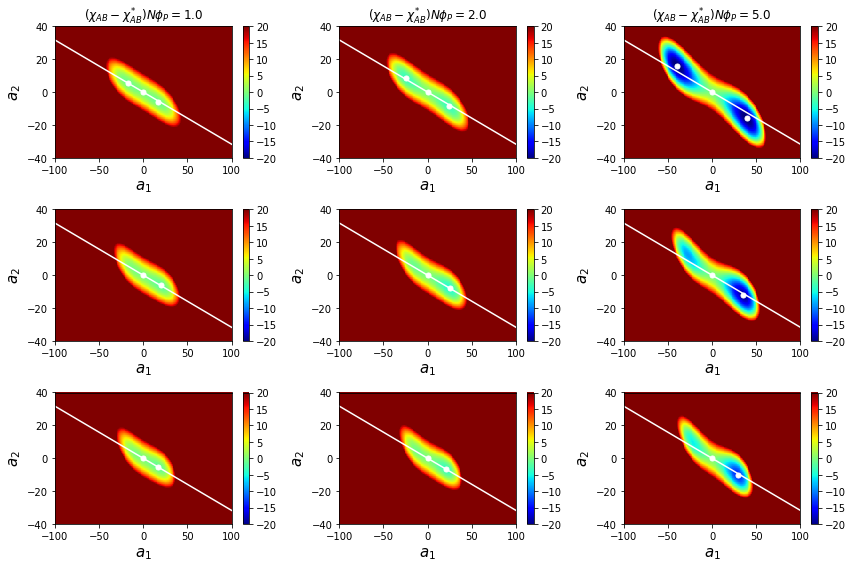

-0.386727650143
-1.66370017715
-1.46360701389
-1.56735746987
-3.73935746026
-3.05073985983
-10.1755414722
-14.0713507823
-10.6024142792


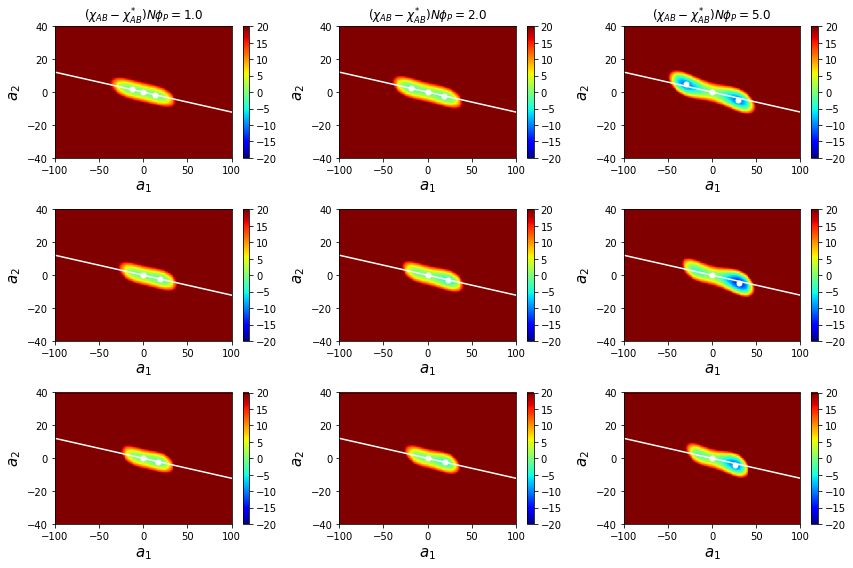

-0.315174944524
-1.64065170517
-1.47317050981
-1.27076646256
-3.51246020444
-2.92061274383
-8.12890112862
-12.4984168698
-9.56282446746


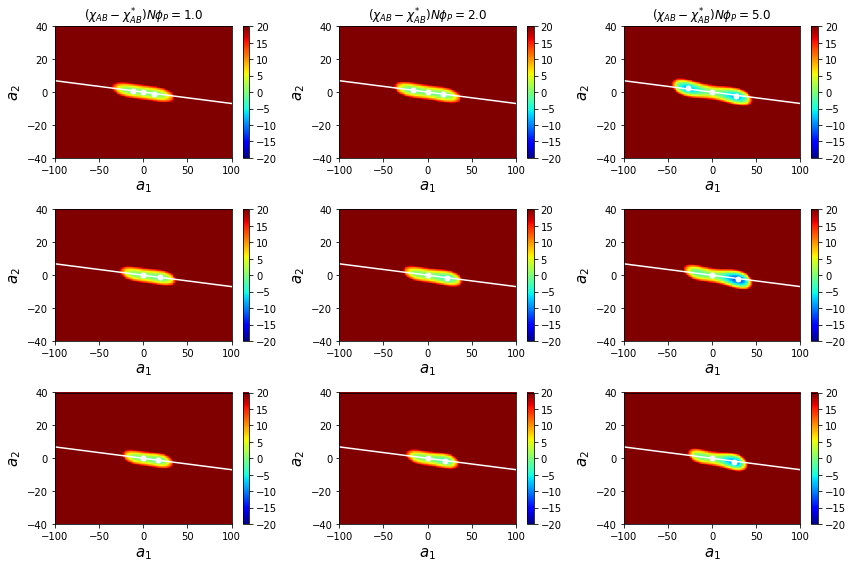

In [67]:
# make surface plot of free energy at fixed CHIAB
for N in [10, 50, 100]:
    FA = 0.2
    PHIP = 0.5
    plotFEsurf(N, FA, PHIP)
    plt.tight_layout()
    plt.show()
#     plt.savefig('figs/energy'+str(N)+'.eps')

### Make phase diagrams

#### recalculate phase diagams

In [ ]:
chiootsol(100, 0.3, 0.5)

In [ ]:
N = 100
FAV = np.linspace(.15, .499, 21)
PHIP = 0.99

CHIsolsV = np.zeros((len(FAV), 1))
CHIsol13V = np.zeros((len(FAV), 1))
CHIsol36V = np.zeros((len(FAV), 1))

for i, FA in enumerate(FAV):
    CHIsolsV[i], CHIsol13V[i], CHIsol36V[i] = chiootsol(N, FA, PHIP)
    print(N, FA, CHIsolsV[i], CHIsol13V[i], CHIsol36V[i])

In [ ]:
FAV = np.linspace(.15, .499, 21)

plt.figure(figsize=(4,5))
# plt.plot(FAV, CHIsV*N, 'k-')
# plt.plot(FAV, (CHIsV+CHI13V)*N, 'r-')
# plt.plot(FAV, (CHIsV+CHI36V)*N, 'b-')
# plt.plot(1-FAV, CHIsV*N, 'k-')
# plt.plot(1-FAV, (CHIsV+CHI13V)*N, 'r-')
# plt.plot(1-FAV, (CHIsV+CHI36V)*N, 'b-')

plt.plot(FAV, CHIsolsV*N*PHIP, 'k--')
plt.plot(FAV, (CHIsolsV+CHIsol13V)*N*PHIP, 'r--')
plt.plot(FAV, (CHIsolsV+CHIsol36V)*N*PHIP, 'b--')
plt.plot(1-FAV, CHIsolsV*N*PHIP, 'k--')
plt.plot(1-FAV, (CHIsolsV+CHIsol13V)*N*PHIP, 'r--')
plt.plot(1-FAV, (CHIsolsV+CHIsol36V)*N*PHIP, 'b--')

plt.axis([0.15,0.85,10,80])
plt.show()

#### Load phase diags from precalculated data

In [491]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = 'data/phasediag'
with open(filename, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

PHIPV = np.array([float(d[0]) for d in data])
NV = np.array([float(d[1]) for d in data])
FAV = np.array([float(d[2]) for d in data])
CHIsV = np.array([float(d[3]) for d in data])
CHI13V = np.array([float(d[4]) for d in data])
CHI36V = np.array([float(d[5]) for d in data])

In [533]:
def plotphase(ax, N, PHIP, cols=['k','r','b'], linestyl='-', alpha=1.0):
    ind1 = np.where(PHIPV == PHIP)
    ind2 = np.where(NV==N)
    inds = np.intersect1d(ind1, ind2)

    ax.plot(FAV[inds], CHIsV[inds], cols[0]+linestyl, alpha=alpha)
    ax.plot(FAV[inds], CHIsV[inds]+CHI13V[inds], cols[1]+linestyl, alpha=alpha)
    ax.plot(FAV[inds], CHIsV[inds]+CHI36V[inds], cols[2]+linestyl, alpha=alpha)
    ax.plot(1-FAV[inds], CHIsV[inds], cols[0]+linestyl, alpha=alpha)
    ax.plot(1-FAV[inds], CHIsV[inds]+CHI13V[inds], cols[1]+linestyl, alpha=alpha)
    ax.plot(1-FAV[inds], CHIsV[inds]+CHI36V[inds], cols[2]+linestyl, alpha=alpha)
    ax.set_xlabel('$f_{A}$', fontsize=15)
    ax.set_ylabel('$\chi N\phi_{P}$', fontsize=15)
    ax.set_title('$\phi_{P}=$'+str(PHIP))
    ax.axis([0.15,0.85,5,30])

In [542]:
for N in [100, 50, 10]:
    f, axarr = plt.subplots(1, 3, figsize=(14,4))
    for i, PHIP in enumerate([0.75, 0.50, 0.25]):
        plotphase(axarr[i], N, 0.99, alpha=0.15, linestyl='--')
        plotphase(axarr[i], N, PHIP)
#     plt.show()
    plt.savefig('figs/phases'+str(N)+'.eps')

# find coefficients in free energy expansion

In [ ]:
Q1 = np.array([1,0,0])
Q2 = -Q1
Qs = [Q1, Q2]

# simple melt case
B, C, D = 0, 0, 0
for Q1 in Qs:
    for Q2 in Qs:
        if norm(Q1+Q2) < 1e-10:
            B +=1

for Q1 in Qs:
    for Q2 in Qs:
        for Q3 in Qs:
            for Q4 in Qs:
                if norm(Q1+Q2+Q3+Q4) < 1e-10:
                    D += 1
print(B, C, D)

# solution case
B = np.zeros((2,2))
C = np.zeros((2,2,2))
D = np.zeros((2,2,2,2))
for I in range(2):
    for J in range(2):
        for Q1 in Qs:
            for Q2 in Qs:
                if norm(Q1+Q2) < 1e-10:
                    B[I][J] += 1

for I in range(2):
    for J in range(2):
        for K in range(2):
            for L in range(2):
                for Q1 in Qs:
                    for Q2 in Qs:
                        for Q3 in Qs:
                            for Q4 in Qs:
                                if norm(Q1+Q2+Q3+Q4) < 1e-10:
                                    D[I][J][K][L] += 1
print(B)
print(D)